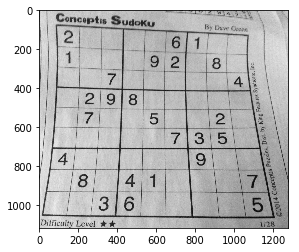

In [84]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import import_ipynb
import preprocess
import utils
from utils import display_img
import predict


img = cv2.imread("test8.jpg")
g = preprocess.grayscale(img)
display_img(g)

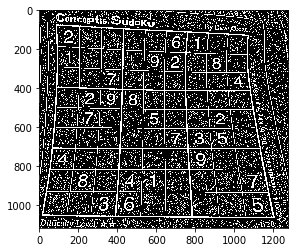

In [85]:
binary = preprocess.convert_to_binary(g)
display_img(binary)

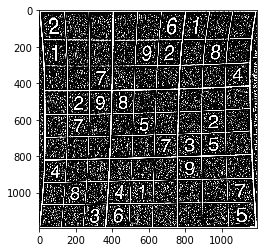

In [86]:
crop = preprocess.perspective_crop(binary)
display_img(crop)

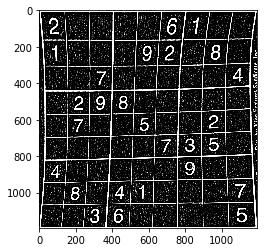

In [87]:
crop = preprocess.remove_noise(crop)
display_img(crop)

In [88]:
grids = utils.get_grids(crop)

In [89]:
# svm prediction
a = []
for i in range(81):
    a.append(preprocess.svm(utils.crop_img(255-crop, i, grids).copy()))

predictions_svm = predict.svm(a)
predictions_svm = utils.convert_to_9x9(predictions_svm) 
predictions_svm

[[9, 0, 0, 0, 0, 4, 1, 0, 0],
 [5, 0, 0, 0, 5, 5, 0, 6, 0],
 [0, 0, 3, 0, 0, 0, 7, 0, 3],
 [7, 3, 2, 2, 7, 7, 0, 0, 0],
 [7, 3, 0, 0, 5, 0, 0, 6, 0],
 [0, 0, 0, 0, 0, 3, 3, 3, 0],
 [3, 0, 0, 0, 0, 0, 6, 0, 0],
 [0, 9, 0, 6, 0, 0, 0, 0, 6],
 [0, 0, 6, 6, 0, 0, 0, 0, 5]]

In [90]:
# cnn prediction
b = []
for i in range(81):
    b.append(preprocess.cnn(utils.crop_img(255-crop, i, grids).copy()))
b = np.asarray(b)

predictions_cnn = predict.cnn(b)
predictions_cnn = utils.convert_to_9x9(predictions_cnn) 
predictions_cnn

[[9, 0, 0, 0, 0, 8, 1, 0, 0],
 [5, 0, 0, 0, 5, 5, 0, 8, 0],
 [5, 0, 5, 0, 0, 0, 0, 0, 6],
 [0, 5, 3, 7, 0, 0, 0, 0, 3],
 [6, 5, 0, 0, 3, 3, 0, 4, 4],
 [0, 0, 0, 0, 0, 4, 6, 0, 3],
 [3, 0, 0, 0, 0, 1, 6, 0, 0],
 [0, 8, 0, 6, 6, 3, 0, 0, 6],
 [0, 0, 9, 0, 0, 3, 0, 0, 5]]

In [37]:
import sudoku

sudoku.solve(predictions_svm)
sudoku.print_sudoku(predictions_svm)

8 | 7 | 2 | 4 | 1 | 3 | 5 | 6 | 9 | 
9 | 5 | 6 | 8 | 2 | 7 | 3 | 1 | 4 | 
1 | 3 | 4 | 6 | 9 | 5 | 7 | 8 | 2 | 
---------- ----------- -----------
4 | 6 | 9 | 7 | 3 | 1 | 8 | 2 | 5 | 
5 | 2 | 8 | 9 | 6 | 4 | 1 | 3 | 7 | 
7 | 1 | 3 | 5 | 8 | 2 | 4 | 9 | 6 | 
---------- ----------- -----------
2 | 9 | 7 | 1 | 4 | 8 | 6 | 5 | 3 | 
6 | 8 | 5 | 3 | 7 | 9 | 2 | 4 | 1 | 
3 | 4 | 1 | 2 | 5 | 6 | 9 | 7 | 8 | 


In [38]:
sudoku.solve(predictions_cnn)
sudoku.print_sudoku(predictions_cnn)

8 | 7 | 2 | 4 | 1 | 3 | 5 | 6 | 9 | 
9 | 5 | 6 | 8 | 2 | 7 | 3 | 1 | 4 | 
1 | 3 | 4 | 6 | 9 | 5 | 7 | 8 | 2 | 
---------- ----------- -----------
4 | 6 | 9 | 7 | 3 | 1 | 8 | 2 | 5 | 
5 | 2 | 8 | 9 | 6 | 4 | 1 | 3 | 7 | 
7 | 1 | 3 | 5 | 8 | 2 | 4 | 9 | 6 | 
---------- ----------- -----------
2 | 9 | 7 | 1 | 4 | 8 | 6 | 5 | 3 | 
6 | 8 | 5 | 3 | 7 | 9 | 2 | 4 | 1 | 
3 | 4 | 1 | 2 | 5 | 6 | 9 | 7 | 8 | 
